In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\adity\UberDataset.csv")

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
## shape of the data
df.shape

(1156, 7)

In [5]:
## info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
### cleaning the data

In [7]:
## converting the startdate and enddate columns to date time format

In [8]:
date = ["START_DATE","END_DATE"]

for i in date:
    df[i] = df[i].str.replace("/","-")

In [9]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [11]:
df.drop(1155,axis=0,inplace=True)

In [12]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [13]:
df.duplicated().sum()

1

In [14]:
df["START"].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [15]:
def correction(ki):
    df[ki] = df[ki].str.replace("?","a")

In [16]:
correction("START")
correction("STOP")

In [17]:
############ df[df["START"]=="Karachi"]
##########  df[df["START"]=="Rawalpindi"]

In [18]:
### checking for the null values

In [19]:
df.isnull().sum()


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [20]:
df["PURPOSE"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [21]:
df["PURPOSE"] = df["PURPOSE"].fillna("unknown")

In [22]:
df["PURPOSE"].unique()

array(['Meal/Entertain', 'unknown', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

<h1>Exploratory Data Analysis</h1>

In [24]:
df["CATEGORY"].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

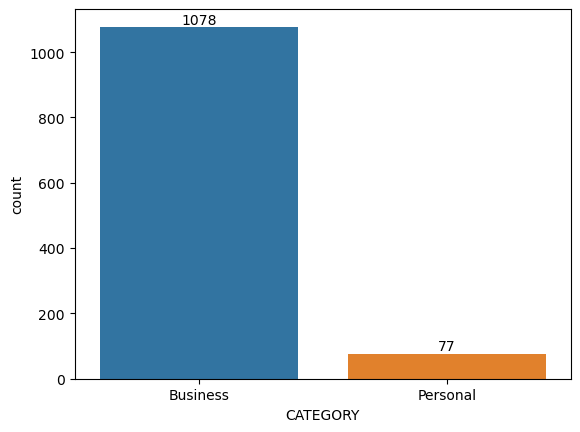

In [25]:
ni =sns.countplot(x="CATEGORY",data=df,hue="CATEGORY")
plt.bar_label(ni.containers[0])
plt.bar_label(ni.containers[1])
plt.show()

In [26]:
### business category is used more than personal category...

In [27]:
df["PURPOSE"].value_counts()

PURPOSE
unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

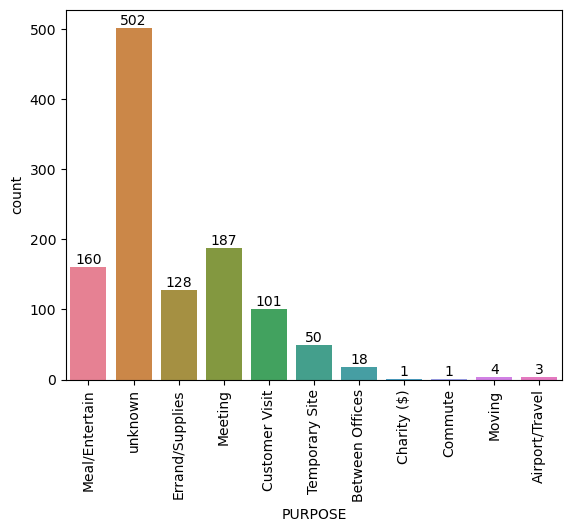

In [28]:
lo =sns.countplot(x="PURPOSE",data=df,hue="PURPOSE")
plt.xticks(rotation=90)
for i in lo.containers:
    plt.bar_label(i)
plt.show()

In [29]:
df["MONTH"] = df["START_DATE"].dt.month_name()

In [30]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,December


In [31]:
## in which month how many booking are done

In [32]:
jio =df["MONTH"].value_counts()

In [33]:
jio

MONTH
December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: count, dtype: int64

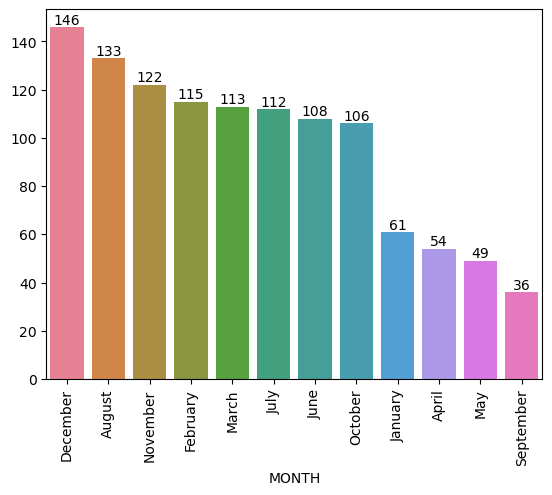

In [34]:
po=sns.barplot(x=jio.index,y=jio.values,hue=jio.index)
plt.xticks(rotation=90)
for i in po.containers:
    plt.bar_label(i)
plt.show()

In [35]:
df["Time"] = df["END_DATE"] - df["START_DATE"]

In [36]:
df["Time"] = df["Time"].dt.total_seconds() // 60 % 60

In [37]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,7.0
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,December,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,December,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,December,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,December,18.0


In [77]:
average_ride_time = df.groupby("PURPOSE")["Time"].mean().reset_index()

In [79]:
average_ride_time

,PURPOSE,Time
0,Airport/Travel,26.000000
1,Between Offices,22.166667
2,Charity ($),27.000000
3,Commute,5.000000
4,Customer Visit,22.722772
5,Errand/Supplies,12.976562
6,Meal/Entertain,15.750000
7,Meeting,23.641711
8,Moving,15.000000
9,Temporary Site,23.460000


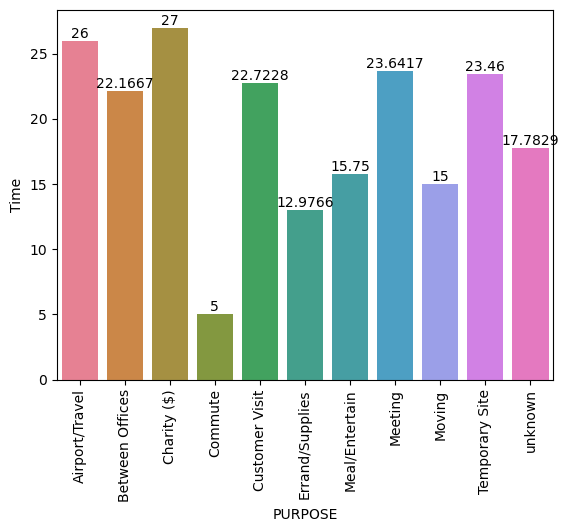

In [99]:
kio =sns.barplot(x="PURPOSE",y="Time",data=average_ride_time,hue="PURPOSE")
plt.xticks(rotation=90)
for i in kio.containers:
    plt.bar_label(i,label_type="edge")
plt.show()

comaparison with the average distance travelled by passenger

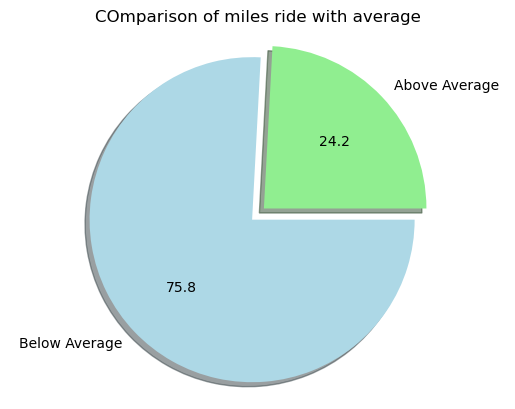

In [110]:
average_value = df["MILES"].mean()

above_average = df[df["MILES"]>average_value].shape[0]
below_average = df[df["MILES"]<average_value].shape[0]


sizes = [above_average,below_average]
labels = ["Above Average","Below Average"]
color = ["lightgreen","lightblue"]
exp = [0.1,0]

plt.pie(sizes,labels=labels,explode=exp,autopct="%.1f",shadow=True,colors=color)
plt.axis("equal")
plt.title("COmparison of miles ride with average")
plt.show()

In [112]:
purpose_type = df["PURPOSE"].value_counts()

In [114]:
purpose_type

PURPOSE
unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

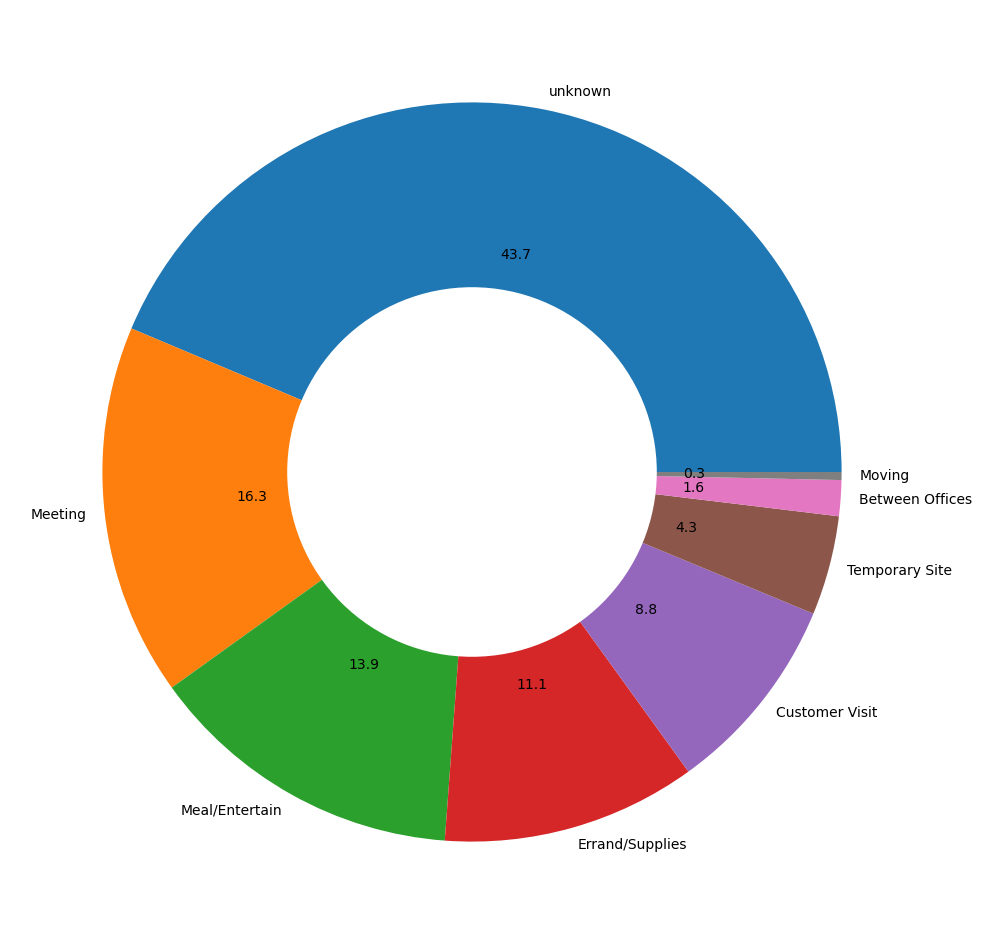

In [146]:
plt.figure(figsize=(12,12))
plt.pie(purpose_type.values[:8],labels=purpose_type.index[:8],autopct="%.1f",labeldistance=1.05)

centre_circle = plt.Circle((0,0),0.50,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [148]:
###least 5 start station

In [150]:
least_5_start_station = df["START"].value_counts().nsmallest(5)

In [152]:
least_5_start_station

START
Parkwood               1
Katunayake             1
Pontchartrain Beach    1
St Thomas              1
Fuquay-Varina          1
Name: count, dtype: int64

In [154]:
##highest 5 Start stations

In [156]:
highest_5_start_station = df["START"].value_counts().nlargest(5)

In [158]:
highest_5_start_station

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: count, dtype: int64

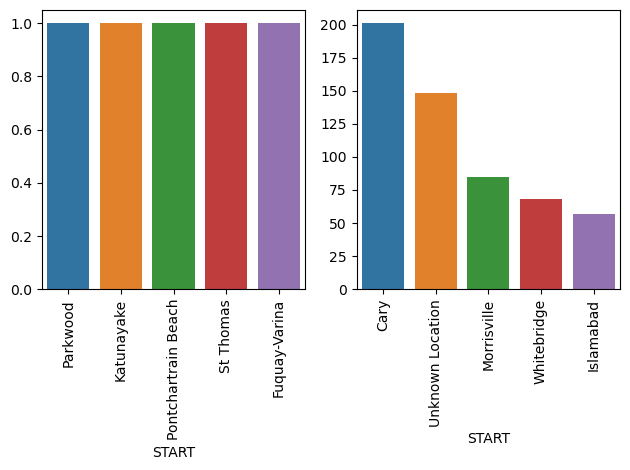

In [166]:
plt.subplot(1,2,1)
sns.barplot(x=least_5_start_station.index,y=least_5_start_station.values,hue=least_5_start_station.index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=highest_5_start_station.index,y=highest_5_start_station.values,hue=highest_5_start_station.index)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Summary

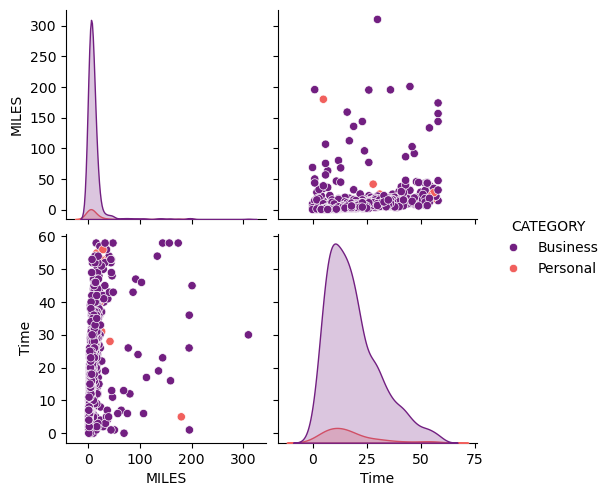

In [171]:
sns.pairplot(df,palette="magma",hue="CATEGORY")